In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rus_df = pd.read_csv('creditcard_scaled.csv')
rus_df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,147571,1.936305,-0.485383,-0.577349,0.384821,-0.383805,-0.135981,-0.461284,-0.112488,1.308280,...,0.942256,-0.070200,-0.639201,0.083861,-0.119594,0.040931,-0.033496,0.506533,0.047052,0
1,240767,2.032182,0.246082,-1.468372,0.517940,0.300593,-1.059914,0.257453,-0.306938,0.287554,...,-0.735354,0.396117,1.023323,-0.302613,0.141628,-0.051420,-0.023538,-0.289387,0.775961,0
2,216268,1.982975,-0.172770,-0.220479,0.452716,-0.584967,-0.723360,-0.337951,-0.184441,1.032248,...,-0.229507,0.353577,0.046262,-0.374867,-0.630356,0.045711,-0.026902,-0.195626,0.654601,0
3,134619,-5.064035,3.573048,-0.219088,-0.602433,-1.635641,-0.560101,0.006071,0.602656,3.411752,...,0.411232,-0.169492,0.426488,0.701066,0.414518,0.913207,0.440709,0.111647,-0.044690,0
4,17594,1.268173,-0.902703,1.340590,-0.779949,-1.583799,0.248364,-1.545265,0.356511,-0.348324,...,1.401185,-0.056872,0.045509,0.192606,-0.027851,0.067045,0.018062,-0.167819,-0.656422,0


<Axes: >

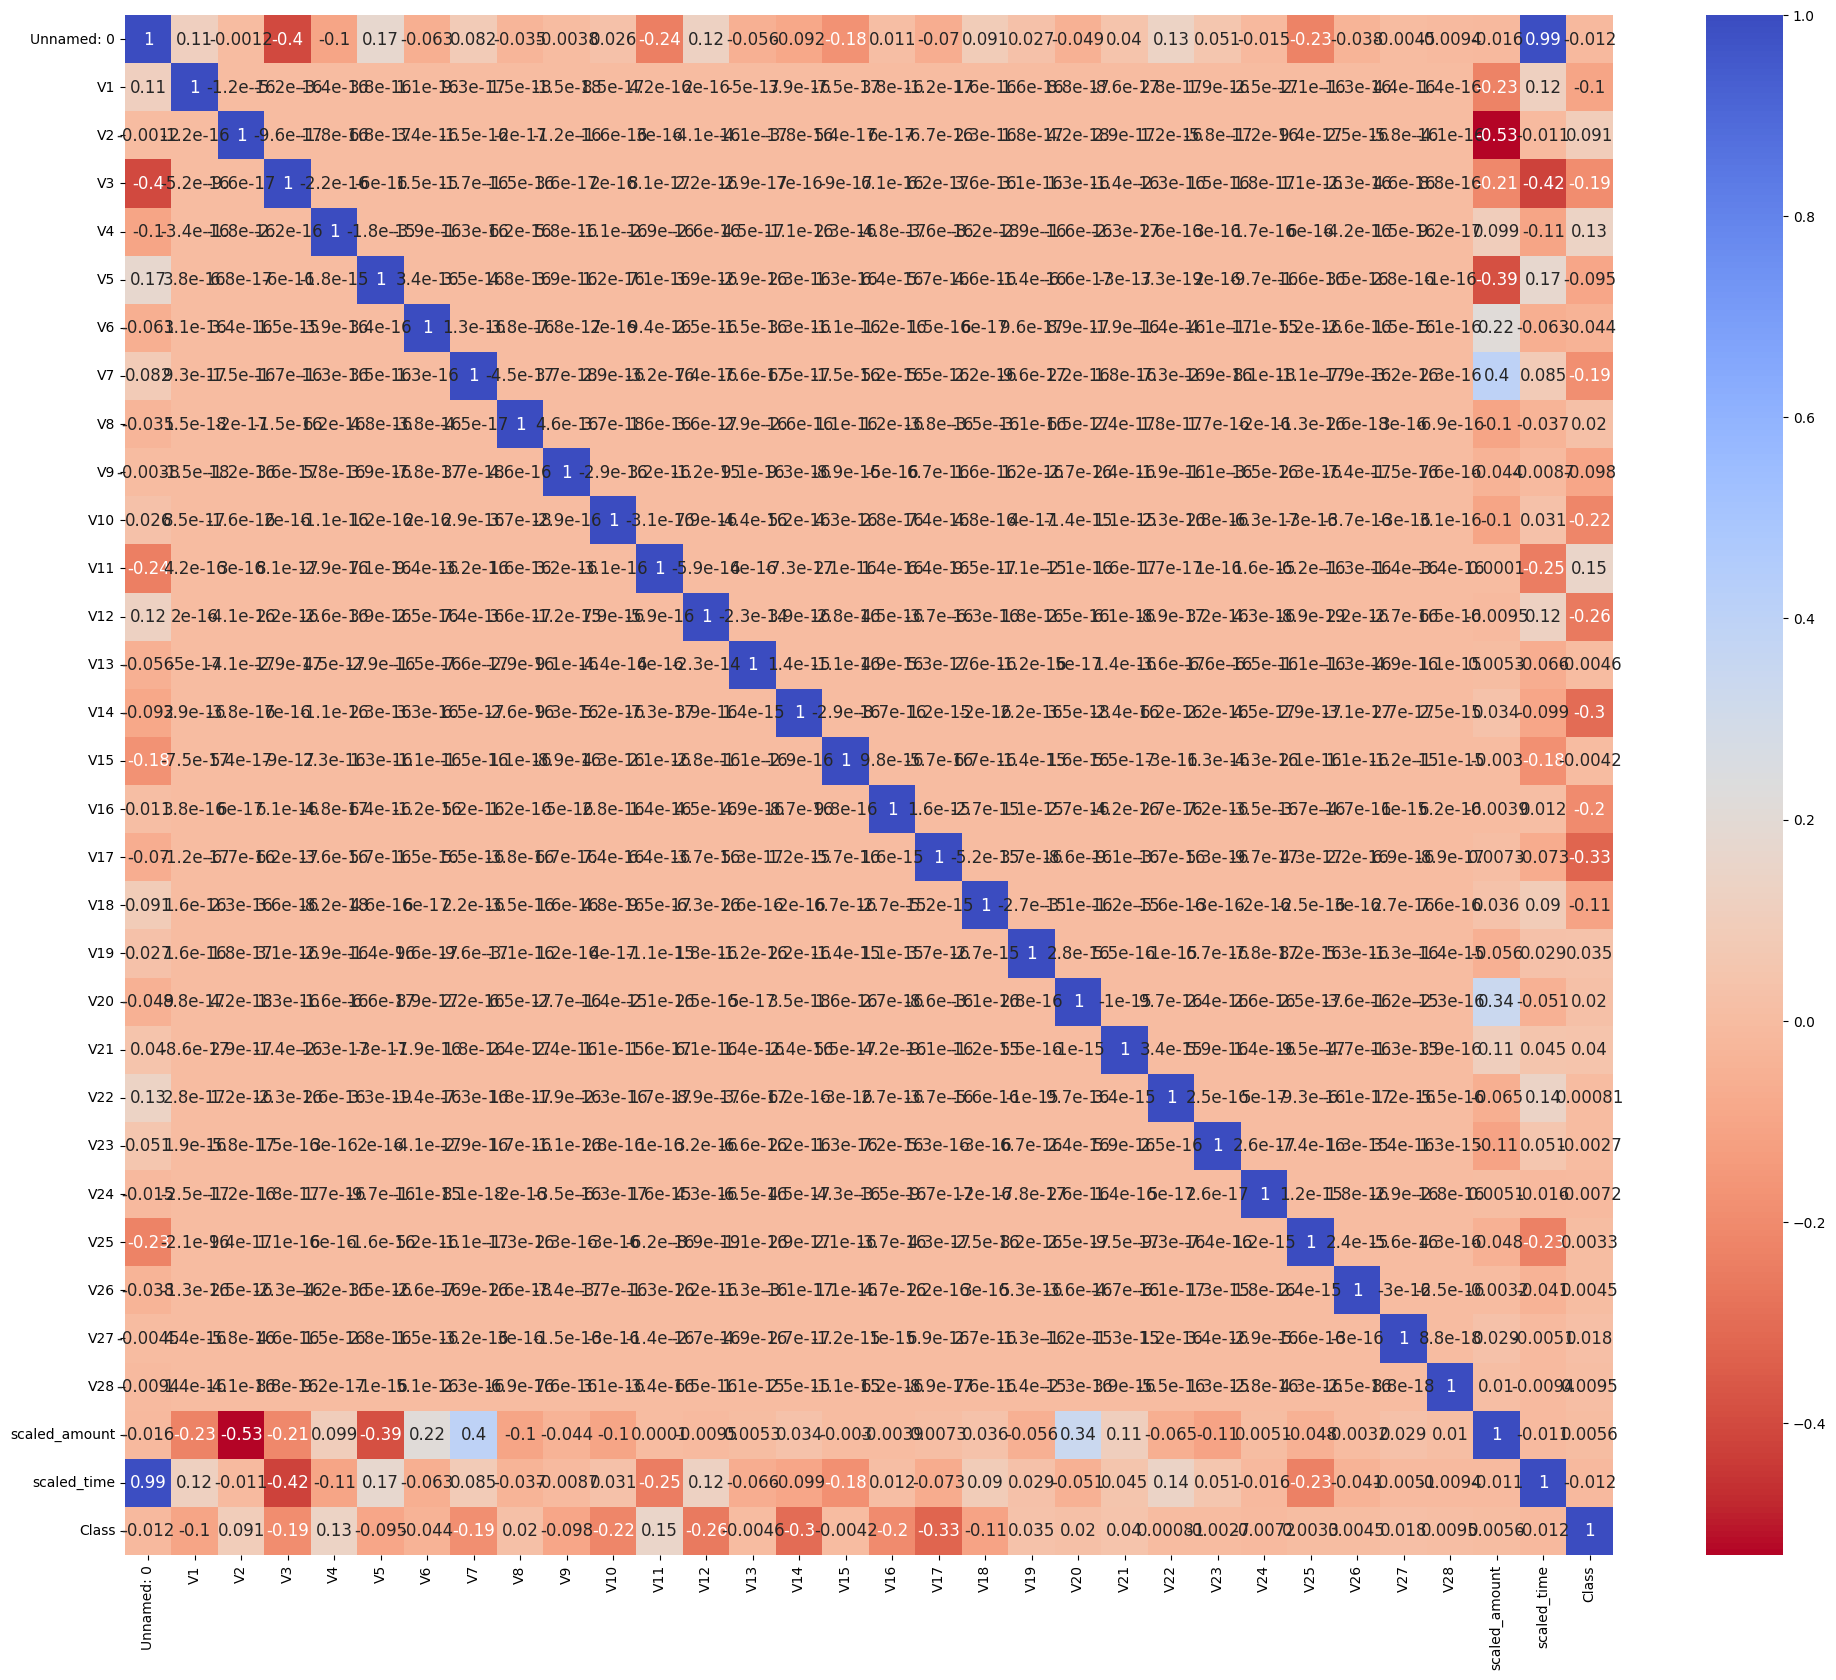

In [3]:
# now we do a correlation matrix to strat some feature engineering hehe

corr_mat = rus_df.corr()
plt.figure(figsize=(24,20))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm_r', annot_kws={'size':12})

C:\Users\Rania\AppData\Local\Temp\ipykernel_17068\879409751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=rus_df, palette='Reds')


Text(0.5, 1.0, 'V14 vs Class Negative Correlation')

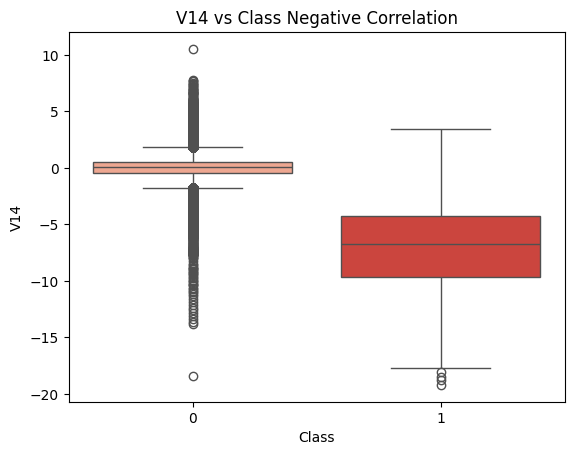

In [4]:
#showing a negative correlation
sns.boxplot(x="Class", y="V14", data=rus_df, palette='Reds')
plt.title('V14 vs Class Negative Correlation')

In [5]:
## Insights explanation : 
'''
on visualise les box plot pour comparare, la boite (mediane iqr), si elle sont tres differentes cela veut dire que chaque classe a des valeur tres differentes de l'attribut, ce qui rend l'attribut interressant, par contre les outliers are an issue.
'''

"\non visualise les box plot pour comparare, la boite (mediane iqr), si elle sont tres differentes cela veut dire que chaque classe a des valeur tres differentes de l'attribut, ce qui rend l'attribut interressant, par contre les outliers are an issue.\n"

C:\Users\Rania\AppData\Local\Temp\ipykernel_17068\3557469971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V11", data=rus_df, palette='Reds')


Text(0.5, 1.0, 'V11 vs Class Positive Correlation')

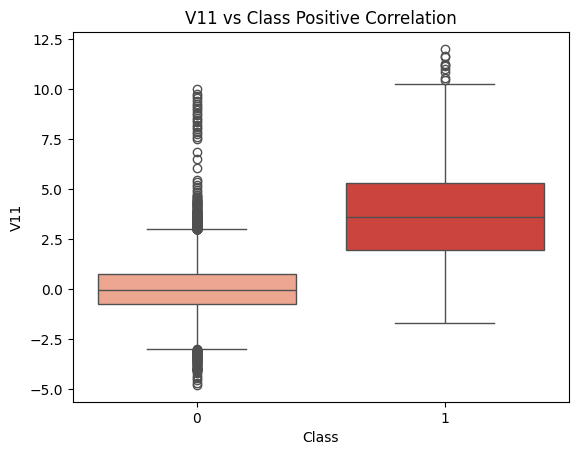

In [6]:
#showing a positive correlation
sns.boxplot(x="Class", y="V11", data=rus_df, palette='Reds')
plt.title('V11 vs Class Positive Correlation')

In [7]:
## removing only extreme outliers (multiplier == 1.5)
## we start by determining which feature has a gaussian distribution 
## Choices :  create Q-Q (Quantile-Quantile) plots for normality of a distribution, or use statistical tests such as the Shapiro-Wilk test

#### If the features are not normally distributed, applying a Gaussian transformation might improve the performance of the algorithm

import scipy.stats as stats
numeric_columns = rus_df.select_dtypes(include=np.number).columns
numeric_columns = numeric_columns.drop('Class')

In [8]:
## Geting outliers from the other class (fraud) 

def outliers(data, col, multiplier = 1.5):
    Q1 = data[col].quantile(0.25)
    Q2 = data[col].quantile(0.50)
    Q3 = data[col].quantile(0.75)
    Q4 = data[col].quantile(1)
    
    IQR = Q3 = Q1
    
    bas = Q1 - multiplier * IQR
    haut = Q3 + multiplier * IQR
    
    outliers = data[(data[col] < bas) | (data[col] > haut)]
    
    return outliers

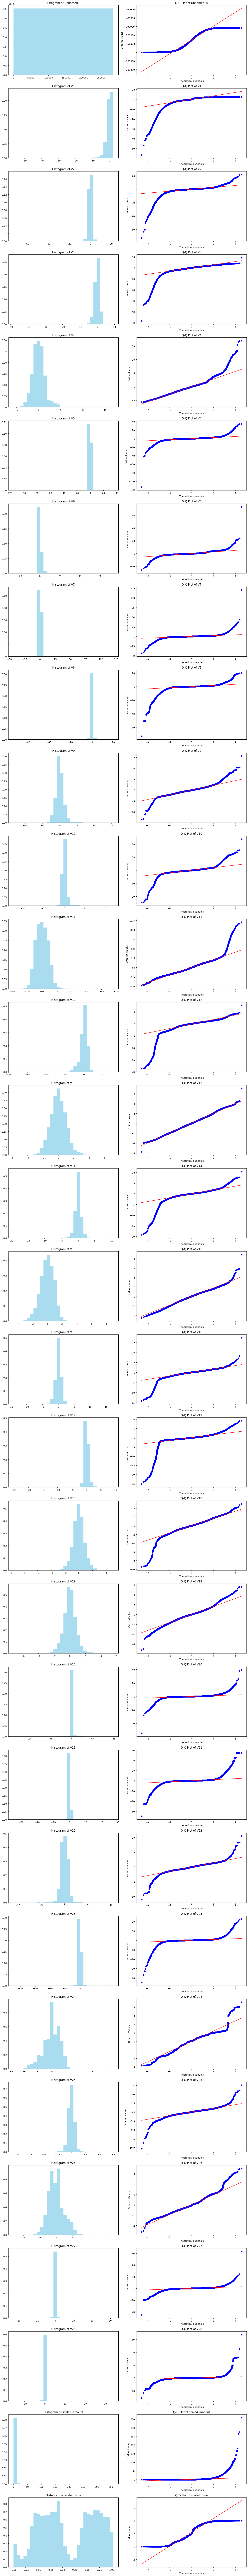

In [9]:
# QQ plot
num_plots = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=2, figsize=(15, 5 * num_plots))

for i, col in enumerate(numeric_columns):
    # hist
    axes[i, 0].hist(rus_df[col], bins=30, density=True, color='skyblue', alpha=0.7)
    axes[i, 0].set_title(f'Histogram of {col}')

    # Plot the Q-Q plot
    stats.probplot(rus_df[col], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

In [10]:
## on calcul les p-values de chaque cols pour voir laquelle suit une loi gausienne, aucune.
from scipy.stats import shapiro

def get_normally_distributed_columns(df):
    normally_distributed_cols = []
    for col in df.columns:
        _, p = shapiro(df[col])
        if p < 0.05: ## not normally distributed
            normally_distributed_cols.append(col)
    return normally_distributed_cols


print(get_normally_distributed_columns(rus_df))



c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


['Unnamed: 0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time', 'Class']


In [11]:
## there is no gaussian transformation to do here